eda- sesion 4

Introducción Análisis Exploratorio de Datos con Pandas
Es un enfoque que comprende un conjunto de tareas para analizar conjuntos de datos para poder encontrar sus principales caracteristicas.

Estas tareas en general comprenden todo lo que tenemos que hacer desde que se formula una pregunta interesante, se reunen los datos y se desarrolla el proceso necesario para poder responder esa pregunta.

Su Objetivo es:

Entender los datos.
Ver caracteristicas de los datos.
Detectar irregularidades (outliers) de los datos.
Obtener valores estadisticos de los datos.
Realizar visualizaciones rapidas que faciliten el proceso de exploracion.
Usualmente el resultado del mismo suele ser un reporte o un notebook, que reune codigo y visualizaciones para llegar a ciertas conclusiones o insights.

Es un proceso iterativo, que se retroalimenta.

En general realizaremos el análisis del mismo sobre uno o varios Dataframes.

Carga Inicial de Librerias

In [3]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

Carga de Informacion del Dataframe

In [4]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [5]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None


In [6]:
# analizemos primero las dimensiones del data frame
df.shape

(16947, 52)

In [9]:
# veamos la informacion general del dataframe con info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [10]:
Stages=df['Stage'].value_counts()

In [11]:
Stages

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

Text(0, 0.5, 'Stage')

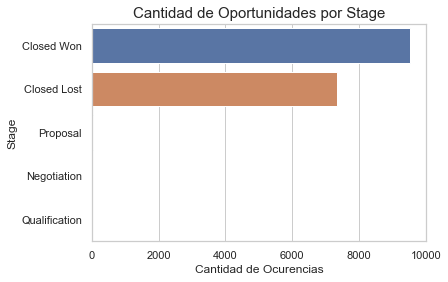

In [12]:
g = sns.barplot(x=Stages.values, y=Stages.index, orient='h')
g.set_title("Cantidad de Oportunidades por Stage", fontsize=15)
g.set_xlabel("Cantidad de Ocurencias", fontsize=12)
g.set_ylabel("Stage", fontsize=12)

In [13]:
###Podemos Observar que las columnas ASP, ASP (Converted) y Total_Amount tienen valores nulos

In [14]:
# si especificamente queremos saber los datatypes que estamos utilizando.
# y por ejemplo decidir setear algunos especificamente en carga
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

Convertimos Fechas

In [15]:
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])
df.info() #Verificamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-n

In [16]:
df['Opportunity_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])
df.info() #Verificamos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-n

In [17]:
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-n

In [19]:
### Ver valores y Conversion de Datos categaricos

In [20]:
regiones= df['Region']

In [21]:
regiones.value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64

In [22]:
df['Region'] = df['Region'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null category
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non

In [24]:
df['Territory'].describe()

count     16947
unique       76
top        None
freq       4999
Name: Territory, dtype: object

In [25]:
df['Territory'].describe()

count     16947
unique       76
top        None
freq       4999
Name: Territory, dtype: object

In [27]:
df['Territory'] = df['Territory'].astype('category')

In [28]:
df['Opportunity_Created_Date'] = pd.to_datetime(df['Account_Created_Date'])

In [29]:
paisFactura= df['Billing_Country'].value_counts()

In [30]:
paisFactura

Japan                                         4879
United States                                 3802
Germany                                       1979
Australia                                     1169
India                                          672
Netherlands                                    563
Singapore                                      432
France                                         396
Spain                                          317
Italy                                          295
United Kingdom                                 284
Belgium                                        226
China                                          222
Thailand                                       195
Austria                                        145
Indonesia                                      142
Philippines                                    138
Luxembourg                                     136
Canada                                         120
Jordan                         

In [31]:
df['Billing_Country'].describe()

count     16947
unique       80
top       Japan
freq       4879
Name: Billing_Country, dtype: object

In [32]:
df['Billing_Country'] = df['Billing_Country'].astype('category')

In [33]:
nombreCuentaCliente=df['Account_Name'].value_counts()

In [34]:
df['Account_Name'].describe()

count                 16947
unique                 1635
top       Account_Name_1888
freq                   2124
Name: Account_Name, dtype: object

In [35]:

df['Account_Type'] = df['Account_Type'].astype('category')
df['Opportunity_Type'] = df['Opportunity_Type'].astype('category')
df['Quote_Type'] = df['Quote_Type'].astype('category')
df['Delivery_Terms'] = df['Delivery_Terms'].astype('category')
df['Brand'] = df['Brand'].astype('category')
df['Product_Type'] = df['Product_Type'].astype('category')

df['Product_Category_B'] = df['Product_Category_B'].astype('category')
df['Currency'] = df['Currency'].astype('category')

df['Product_Family'] = df['Product_Family'].astype('category')

df['ASP_Currency'] = df['ASP_Currency'].astype('category')
df['ASP_(converted)_Currency'] = df['ASP_(converted)_Currency'].astype('category')
df['Delivery_Quarter'] = df['Delivery_Quarter'].astype('category')
df['Total_Taxable_Amount_Currency'] = df['Total_Taxable_Amount_Currency'].astype('category')
df['Stage'] = df['Stage'].astype('category')
df['Prod_Category_A'] = df['Prod_Category_A'].astype('category')
df['Size'] = df['Size'].astype('category')

In [36]:

df['Bureaucratic_Code'] = df['Bureaucratic_Code'].astype('category')

In [37]:
df['Bureaucratic_Code'] = df['Bureaucratic_Code'].astype('category')

In [38]:
df['Source '] = df['Source '].astype('category')

In [39]:

df['Price']=pd.to_numeric(df.Price,errors='coerce')

In [40]:
df['Account_Name'] = df['Account_Name'].astype('category')
df['Opportunity_Name'] = df['Opportunity_Name'].astype('category')
df['Account_Owner'] = df['Account_Owner'].astype('category')
df['Opportunity_Owner'] = df['Opportunity_Owner'].astype('category')
df['Size'] = df['Size'].astype('category')
df['Last_Modified_By'] = df['Last_Modified_By'].astype('category')
df['Product_Name'] = df['Product_Name'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null category
Territory                             16947 non-null category
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null category
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null category
Billing_Country                       16947 non-null category
Account_Name                          16947 non-null category
Opportunity_Name                      16947 non-null category
Opportunity_ID                     

In [42]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [43]:

df['Last_Activity'] = pd.to_datetime(df['Last_Activity'])

In [44]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null category
Territory                             16947 non-null category
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null category
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null category
Billing_Country                       16947 non-null category
Account_Name                          16947 non-null category
Opportunity_Name                      16947 non-null category
Opportunity_ID                     

In [46]:
df['Total_Amount_Currency'].describe()

count     16947
unique        5
top         USD
freq       7361
Name: Total_Amount_Currency, dtype: object

In [47]:
df['Total_Amount_Currency'] = df['Total_Amount_Currency'].astype('category')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null category
Territory                             16947 non-null category
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null category
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null category
Billing_Country                       16947 non-null category
Account_Name                          16947 non-null category
Opportunity_Name                      16947 non-null category
Opportunity_ID                     

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null category
Territory                             16947 non-null category
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null category
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null category
Billing_Country                       16947 non-null category
Account_Name                          16947 non-null category
Opportunity_Name                      16947 non-null category
Opportunity_ID                     

Analisando la variable objetivo que es Stage, vamos a filtrar solo los closed won y closed los

Analisis de una oportunidad

In [50]:
wl= df.loc[(df.Stage.str.contains('Closed Won')) | (df.Stage.str.contains('Closed Lost') ) ,:]

In [51]:
wl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16883 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16883 non-null int64
Region                                16883 non-null category
Territory                             16883 non-null category
Pricing, Delivery_Terms_Quote_Appr    16883 non-null int64
Pricing, Delivery_Terms_Approved      16883 non-null int64
Bureaucratic_Code_0_Approval          16883 non-null int64
Bureaucratic_Code_0_Approved          16883 non-null int64
Submitted_for_Approval                16883 non-null int64
Bureaucratic_Code                     16883 non-null category
Account_Created_Date                  16883 non-null datetime64[ns]
Source                                16883 non-null category
Billing_Country                       16883 non-null category
Account_Name                          16883 non-null category
Opportunity_Name                      16883 non-null category
Opportunity_ID                     

In [52]:
wl['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Qualification       0
Proposal            0
Negotiation         0
Name: Stage, dtype: int64

Verificacion de Calidad de Datos
Algunas verificaciones que son utiles para ver la consistencia de los datos, en particular si vienen de una fuente de ese tipo.

Podemos verificar las dimensiones del data frame (via .shape), si existen valores nulos (via .insnull) en el mismo y metricas generales de las columnas o features del data frame que podemos analizar via .describe

In [175]:
# por ejemplo de la siguiente forma podemos ver los nulos si existen
projects_2017.isnull().any()

In [53]:
wl.isnull().any()

ID                                    False
Region                                False
Territory                             False
Pricing, Delivery_Terms_Quote_Appr    False
Pricing, Delivery_Terms_Approved      False
Bureaucratic_Code_0_Approval          False
Bureaucratic_Code_0_Approved          False
Submitted_for_Approval                False
Bureaucratic_Code                     False
Account_Created_Date                  False
Source                                False
Billing_Country                       False
Account_Name                          False
Opportunity_Name                      False
Opportunity_ID                        False
Sales_Contract_No                     False
Account_Owner                         False
Opportunity_Owner                     False
Account_Type                          False
Opportunity_Type                      False
Quote_Type                            False
Delivery_Terms                        False
Opportunity_Created_Date        

In [54]:
wl.isnull().sum()

ID                                        0
Region                                    0
Territory                                 0
Pricing, Delivery_Terms_Quote_Appr        0
Pricing, Delivery_Terms_Approved          0
Bureaucratic_Code_0_Approval              0
Bureaucratic_Code_0_Approved              0
Submitted_for_Approval                    0
Bureaucratic_Code                         0
Account_Created_Date                      0
Source                                    0
Billing_Country                           0
Account_Name                              0
Opportunity_Name                          0
Opportunity_ID                            0
Sales_Contract_No                         0
Account_Owner                             0
Opportunity_Owner                         0
Account_Type                              0
Opportunity_Type                          0
Quote_Type                                0
Delivery_Terms                            0
Opportunity_Created_Date        

La informacion que podemos considerar en relacion a los nulos nos permite guiarnos sobre la calidad del set de datos que tenemos y casos en los que podemos ver por ejemplo que datos utilizar o no sobre nuestros analisis o si eventualmente tenemos que realizar algun otro tipo de informacion

In [55]:
wl.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,Price,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,"16,883.00","16,883.00","16,883.00","16,883.00","16,883.00","16,883.00","16,883.00",356.00,"13,679.00","13,679.00","16,883.00","16,883.00","16,824.00","16,883.00"
mean,"17,689.64",0.81,0.58,0.47,0.32,0.00,"5,317.06",0.32,6.98,0.43,"2,017.13",2.34,"1,784,533.41","3,095,833.49"
std,"6,938.73",0.39,0.49,0.50,0.47,0.00,"3,316.27",0.07,18.85,0.76,0.82,12.19,"13,020,657.42","18,549,643.54"
min,"4,854.00",0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,"2,016.00",0.00,0.00,0.00
25%,"12,013.50",1.00,0.00,0.00,0.00,0.00,"2,438.50",0.26,0.36,0.38,"2,016.00",0.00,"26,600.00","85,407.52"
50%,"18,152.00",1.00,1.00,0.00,0.00,0.00,"5,295.00",0.31,0.40,0.41,"2,017.00",0.00,"106,979.00","375,394.50"
75%,"23,900.50",1.00,1.00,1.00,1.00,0.00,"7,664.50",0.37,0.51,0.48,"2,018.00",1.00,"454,062.50","1,031,472.00"
max,"28,773.00",1.00,1.00,1.00,1.00,0.00,"12,803.00",0.56,80.00,67.00,"2,019.00",500.00,"919,992,410.00","1,356,338,620.00"


In [56]:
# para visualizar toda la informacion
wl.describe(include='all')

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
count,"16,883.00",16883,16883,"16,883.00","16,883.00","16,883.00","16,883.00","16,883.00",16883,16883,...,16883,"16,883.00",16883,"16,883.00",16883,"16,824.00",16883,"16,883.00",16883,16883
unique,nan,5,75,nan,nan,nan,nan,nan,7,800,...,4,nan,1,nan,5,nan,5,nan,2,1
top,nan,Japan,None,nan,nan,nan,nan,nan,Bureaucratic_Code_4,2015-04-20 00:00:00,...,Q2,nan,NaT,nan,USD,nan,USD,nan,Closed Won,Prod_Category_A_None
freq,nan,4869,4981,nan,nan,nan,nan,nan,12544,3009,...,4423,nan,16883,nan,7321,nan,7305,nan,9533,16883
first,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,2013-07-27 00:00:00,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,NaN
last,nan,NaN,NaN,nan,nan,nan,nan,nan,NaN,2018-12-17 00:00:00,...,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,NaN
mean,"17,689.64",NaN,NaN,0.81,0.58,0.47,0.32,0.00,NaN,NaN,...,NaN,"2,017.13",NaN,2.34,NaN,"1,784,533.41",NaN,"3,095,833.49",NaN,NaN
std,"6,938.73",NaN,NaN,0.39,0.49,0.50,0.47,0.00,NaN,NaN,...,NaN,0.82,NaN,12.19,NaN,"13,020,657.42",NaN,"18,549,643.54",NaN,NaN
min,"4,854.00",NaN,NaN,0.00,0.00,0.00,0.00,0.00,NaN,NaN,...,NaN,"2,016.00",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN
25%,"12,013.50",NaN,NaN,1.00,0.00,0.00,0.00,0.00,NaN,NaN,...,NaN,"2,016.00",NaN,0.00,NaN,"26,600.00",NaN,"85,407.52",NaN,NaN


Cada fila del dataframe es un item de una oportunidad. Si agrupan por Opportunity_Name y suman los Total_Amount deberían llegar a Total_Taxable_Amount. Si esto no se cumple en todos, es algo para analizar en el TP.


In [57]:
wl['suma_total_oportunidad'] = wl.groupby('Opportunity_Name')['Total_Amount'].transform('sum')

In [58]:
wl['suma_menor_presu'] = wl['suma_total_oportunidad'] < wl['Total_Taxable_Amount']

In [59]:
wl[wl['suma_menor_presu']].count()

ID                                    245
Region                                245
Territory                             245
Pricing, Delivery_Terms_Quote_Appr    245
Pricing, Delivery_Terms_Approved      245
Bureaucratic_Code_0_Approval          245
Bureaucratic_Code_0_Approved          245
Submitted_for_Approval                245
Bureaucratic_Code                     245
Account_Created_Date                  245
Source                                245
Billing_Country                       245
Account_Name                          245
Opportunity_Name                      245
Opportunity_ID                        245
Sales_Contract_No                     245
Account_Owner                         245
Opportunity_Owner                     245
Account_Type                          245
Opportunity_Type                      245
Quote_Type                            245
Delivery_Terms                        245
Opportunity_Created_Date              245
Brand                             

In [60]:
wl[wl['suma_menor_presu']]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,suma_total_oportunidad,suma_menor_presu
70,19680,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,NaT,0,EUR,"107,250.00",EUR,"420,750.00",Closed Won,Prod_Category_A_None,"317,625.00",True
71,19683,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,NaT,0,EUR,"103,125.00",EUR,"420,750.00",Closed Won,Prod_Category_A_None,"317,625.00",True
72,19686,EMEA,United Kingdom,0,0,0,0,0,Bureaucratic_Code_4,2013-07-27,...,NaT,0,EUR,"107,250.00",EUR,"420,750.00",Closed Won,Prod_Category_A_None,"317,625.00",True
137,23583,APAC,India,1,0,1,0,0,Bureaucratic_Code_5,2014-12-18,...,NaT,13,USD,"6,695,835.30",USD,"13,438,632.90",Closed Lost,Prod_Category_A_None,"13,438,632.90",True
138,23584,APAC,India,1,0,1,0,0,Bureaucratic_Code_5,2014-12-18,...,NaT,13,USD,"6,742,797.60",USD,"13,438,632.90",Closed Lost,Prod_Category_A_None,"13,438,632.90",True
1138,7112,APAC,Thailand,0,0,0,0,0,Bureaucratic_Code_4,2017-02-02,...,NaT,0,USD,"51,408.00",USD,"51,512.40",Closed Won,Prod_Category_A_None,"51,408.00",True
1594,9767,EMEA,None,1,1,0,0,0,Bureaucratic_Code_4,2017-02-27,...,NaT,0,EUR,"12,432.00",USD,"14,061.76",Closed Lost,Prod_Category_A_None,"12,432.00",True
2200,27692,Japan,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-11,...,NaT,0,USD,"12,194,000.00",JPY,"1,356,338,620.00",Closed Won,Prod_Category_A_None,"12,194,000.00",True
2777,10136,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,2016-01-29,...,NaT,0,USD,"18,925.73",USD,"44,005.73",Closed Won,Prod_Category_A_None,"44,005.73",True
2778,10141,APAC,China (PRC),1,1,1,1,0,Bureaucratic_Code_4,2016-01-29,...,NaT,0,USD,"25,080.00",USD,"44,005.73",Closed Won,Prod_Category_A_None,"44,005.73",True


In [61]:
wl1=wl[wl['suma_menor_presu']]

In [62]:
wl1.Opportunity_Name

70       Opportunity_Name_12137
71       Opportunity_Name_12137
72       Opportunity_Name_12137
137       Opportunity_Name_5030
138       Opportunity_Name_5030
1138     Opportunity_Name_11024
1594       Opportunity_Name_224
2200      Opportunity_Name_6550
2777      Opportunity_Name_3373
2778      Opportunity_Name_3373
2902      Opportunity_Name_3364
2903      Opportunity_Name_3364
2904      Opportunity_Name_3364
3412     Opportunity_Name_10691
3413     Opportunity_Name_10691
3414     Opportunity_Name_10691
3415     Opportunity_Name_10691
3579      Opportunity_Name_3463
4526       Opportunity_Name_847
4527       Opportunity_Name_847
4528       Opportunity_Name_847
4529       Opportunity_Name_847
4530       Opportunity_Name_847
4531       Opportunity_Name_847
4532       Opportunity_Name_847
4533       Opportunity_Name_847
4534       Opportunity_Name_847
4535       Opportunity_Name_847
4536       Opportunity_Name_847
4537       Opportunity_Name_847
                  ...          
16238   

In [63]:
wl1.Opportunity_Name.unique()

[Opportunity_Name_12137, Opportunity_Name_5030, Opportunity_Name_11024, Opportunity_Name_224, Opportunity_Name_6550, ..., Opportunity_Name_5036, Opportunity_Name_4540, Opportunity_Name_10790, Opportunity_Name_6177, Opportunity_Name_2802]
Length: 51
Categories (51, object): [Opportunity_Name_12137, Opportunity_Name_5030, Opportunity_Name_11024, Opportunity_Name_224, ..., Opportunity_Name_4540, Opportunity_Name_10790, Opportunity_Name_6177, Opportunity_Name_2802]

In [64]:
wl1[['Opportunity_Name','Total_Taxable_Amount','suma_total_oportunidad']].values

array([['Opportunity_Name_12137', 420750.0, 317625.0],
       ['Opportunity_Name_12137', 420750.0, 317625.0],
       ['Opportunity_Name_12137', 420750.0, 317625.0],
       ['Opportunity_Name_5030', 13438632.9, 13438632.899999999],
       ['Opportunity_Name_5030', 13438632.9, 13438632.899999999],
       ['Opportunity_Name_11024', 51512.4, 51408.0],
       ['Opportunity_Name_224', 14061.75772, 12432.0],
       ['Opportunity_Name_6550', 1356338620.0, 12194000.0],
       ['Opportunity_Name_3373', 44005.73, 44005.729999999996],
       ['Opportunity_Name_3373', 44005.73, 44005.729999999996],
       ['Opportunity_Name_3364', 53904.4, 53904.399999999994],
       ['Opportunity_Name_3364', 53904.4, 53904.399999999994],
       ['Opportunity_Name_3364', 53904.4, 53904.399999999994],
       ['Opportunity_Name_10691', 13276972.8, 13276972.799999999],
       ['Opportunity_Name_10691', 13276972.8, 13276972.799999999],
       ['Opportunity_Name_10691', 13276972.8, 13276972.799999999],
       ['Opportun

In [65]:
df['Total_Amount'].describe()

count              16,888.00
mean            1,993,659.22
std            18,484,259.88
min                     0.00
25%                26,775.00
50%               107,250.00
75%               460,389.83
max         1,320,000,000.00
Name: Total_Amount, dtype: float64

total_Amount en cero

In [66]:
df[df['Total_Amount'] == 0].count()

ID                                    52
Region                                52
Territory                             52
Pricing, Delivery_Terms_Quote_Appr    52
Pricing, Delivery_Terms_Approved      52
Bureaucratic_Code_0_Approval          52
Bureaucratic_Code_0_Approved          52
Submitted_for_Approval                52
Bureaucratic_Code                     52
Account_Created_Date                  52
Source                                52
Billing_Country                       52
Account_Name                          52
Opportunity_Name                      52
Opportunity_ID                        52
Sales_Contract_No                     52
Account_Owner                         52
Opportunity_Owner                     52
Account_Type                          52
Opportunity_Type                      52
Quote_Type                            52
Delivery_Terms                        52
Opportunity_Created_Date              52
Brand                                 52
Product_Type    

In [67]:
df['Total_Amount'].isnull().sum()

59

In [68]:

df['Total_Amount'].hasnans #antes de transformar el tipo de dato vemos si hay algun nulo que pueda ocasionar problemas en la transformacion

True

In [70]:
df['Total_Amount'] .isnull().values.any()

True

In [71]:
df['Total_Amount'] .isnull().values

array([False, False, False, ..., False, False, False])

In [72]:
df['Total_Amount']= df['Total_Amount'].fillna('123456789')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null category
Territory                             16947 non-null category
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null category
Account_Created_Date                  16947 non-null datetime64[ns]
Source                                16947 non-null category
Billing_Country                       16947 non-null category
Account_Name                          16947 non-null category
Opportunity_Name                      16947 non-null category
Opportunity_ID                     

In [74]:
df[df['Total_Amount'] == '123456789']

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
16114,21004,APAC,Philippines,0,0,0,0,0,Bureaucratic_Code_1,2014-07-11,...,Q1,2016,NaT,5,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16117,16674,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2013-10-03,...,Q4,2016,NaT,1,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16118,16678,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2013-10-03,...,Q3,2016,NaT,2,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16119,16681,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2013-10-03,...,Q3,2016,NaT,2,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16120,16684,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2013-10-03,...,Q2,2016,NaT,1,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16121,16688,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2013-10-03,...,Q1,2016,NaT,1,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16122,16691,APAC,Philippines,1,0,0,0,0,Bureaucratic_Code_5,2013-10-03,...,Q1,2016,NaT,0,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16123,21851,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2014-09-17,...,Q1,2016,NaT,20,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16124,21855,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2014-09-17,...,Q1,2016,NaT,20,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None
16125,23234,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_1,2014-09-25,...,Q2,2016,NaT,0,USD,123456789,USD,0.00,Closed Lost,Prod_Category_A_None


In [75]:
df['ASP'].isnull().sum()

3209

In [76]:
df['Total_Amount'].isnull().sum()

0

In [77]:
df['ASP'].isnull().values

array([False, False, False, ..., False, False, False])

In [78]:
df[df['ASP'] == 0].count()

ID                                    301
Region                                301
Territory                             301
Pricing, Delivery_Terms_Quote_Appr    301
Pricing, Delivery_Terms_Approved      301
Bureaucratic_Code_0_Approval          301
Bureaucratic_Code_0_Approved          301
Submitted_for_Approval                301
Bureaucratic_Code                     301
Account_Created_Date                  301
Source                                301
Billing_Country                       301
Account_Name                          301
Opportunity_Name                      301
Opportunity_ID                        301
Sales_Contract_No                     301
Account_Owner                         301
Opportunity_Owner                     301
Account_Type                          301
Opportunity_Type                      301
Quote_Type                            301
Delivery_Terms                        301
Opportunity_Created_Date              301
Brand                             

In [79]:
df['ASP'].isna().sum()

3209

In [80]:
df.Region.value_counts().sum()

16947

Analisis Regional de las Oportunidades de Negocio

Filtro solo lost o won

In [81]:
wl= df.loc[(df.Stage.str.contains('Closed Won')) | (df.Stage.str.contains('Closed Lost') ) ,:]

In [90]:
wl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16883 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16883 non-null int64
Region                                16883 non-null category
Territory                             16883 non-null category
Pricing, Delivery_Terms_Quote_Appr    16883 non-null int64
Pricing, Delivery_Terms_Approved      16883 non-null int64
Bureaucratic_Code_0_Approval          16883 non-null int64
Bureaucratic_Code_0_Approved          16883 non-null int64
Submitted_for_Approval                16883 non-null int64
Bureaucratic_Code                     16883 non-null category
Account_Created_Date                  16883 non-null datetime64[ns]
Source                                16883 non-null category
Billing_Country                       16883 non-null category
Account_Name                          16883 non-null category
Opportunity_Name                      16883 non-null category
Opportunity_ID                     

In [91]:
wl

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,"5,272,800.00",EUR,"5,272,800.00",Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,"48,230.00",EUR,"48,230.00",Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,"83,865.60",USD,"83,865.60",Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,"7,421,881.50",USD,"7,421,881.50",Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,"13,357,192.50",USD,"13,357,192.50",Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,28,USD,"14,838,277.50",USD,"14,838,277.50",Closed Lost,Prod_Category_A_None
6,16799,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2017,NaT,7,USD,"2,659,494.60",USD,"2,659,494.60",Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,1,1,1,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,"50,688.00",USD,"50,688.00",Closed Won,Prod_Category_A_None
8,24353,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,Q1,2016,NaT,0,JPY,"15,600.00",JPY,"470,400.00",Closed Lost,Prod_Category_A_None
9,24355,Japan,None,1,0,0,0,0,Bureaucratic_Code_5,2015-04-20,...,Q1,2016,NaT,0,JPY,"4,400.00",JPY,"470,400.00",Closed Lost,Prod_Category_A_None


In [92]:
df_short=wl[['Region','Opportunity_Name','Stage']]

In [93]:
df_sin_duplicados = df_short.drop_duplicates() 

In [94]:
Estados=df_sin_duplicados['Stage'].value_counts()

In [95]:
Estados

Closed Won       5072
Closed Lost      4719
Qualification       0
Proposal            0
Negotiation         0
Name: Stage, dtype: int64

Text(0, 0.5, 'Cantidad de Oportunidades')

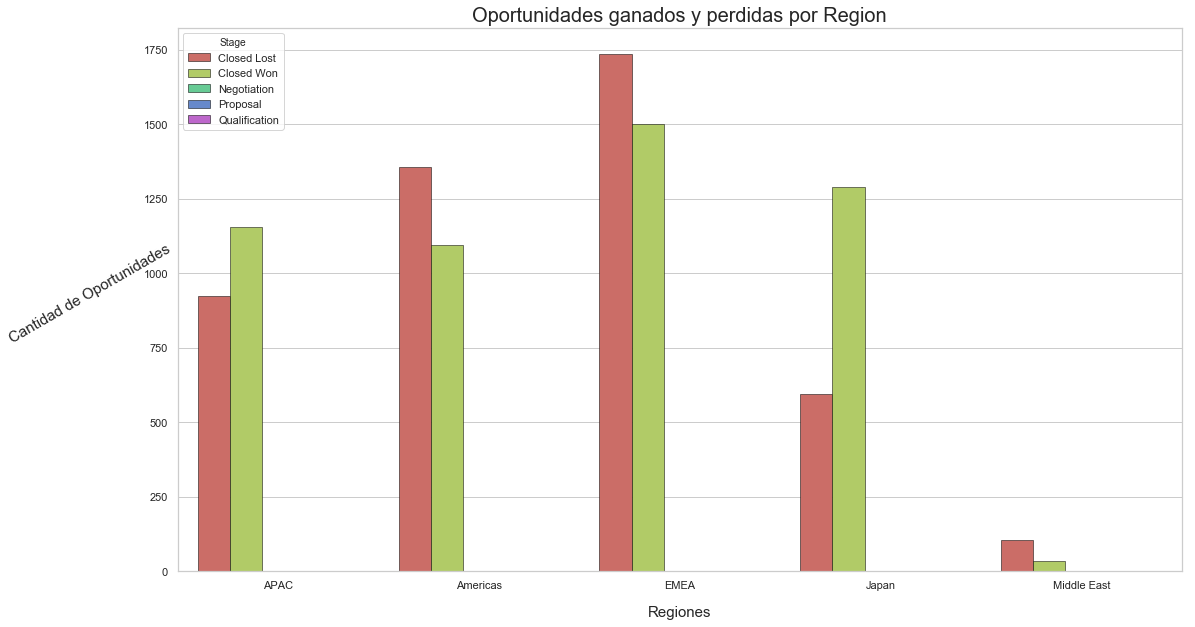

In [96]:
fig, ax = plt.subplots(figsize=(18,10))
                  
g = sns.countplot(x='Region', hue='Stage', data=df_sin_duplicados, palette="hls", ax=ax, edgecolor='black', linewidth=0.5)
g.set_title('Oportunidades ganados y perdidas por Region', fontsize=20)
g.set_xlabel('Regiones', labelpad=15, fontsize=15)
g.set_xticklabels(g.get_xticklabels(), fontsize=11)
g.set_ylabel('Cantidad de Oportunidades', rotation=30, labelpad=50, fontsize=15)

In [97]:
df_sin_duplicados

,Region,Opportunity_Name,Stage
0,EMEA,Opportunity_Name_12598,Closed Lost
1,EMEA,Opportunity_Name_12600,Closed Won
2,Americas,Opportunity_Name_469,Closed Won
3,Americas,Opportunity_Name_415,Closed Lost
4,Americas,Opportunity_Name_851,Closed Lost
5,Americas,Opportunity_Name_939,Closed Lost
6,Americas,Opportunity_Name_1618,Closed Lost
7,Americas,Opportunity_Name_8227,Closed Won
8,Japan,Opportunity_Name_6151,Closed Lost
13,Japan,Opportunity_Name_6817,Closed Lost


In [98]:

sum_per_each = pd.crosstab(df_sin_duplicados['Stage'],df_sin_duplicados['Region']).sum().to_frame().T

In [99]:
sum_per_each

Region,APAC,Americas,EMEA,Japan,Middle East
0,2079,2452,3237,1885,138


In [100]:


df_sin_duplicados

,Region,Opportunity_Name,Stage
0,EMEA,Opportunity_Name_12598,Closed Lost
1,EMEA,Opportunity_Name_12600,Closed Won
2,Americas,Opportunity_Name_469,Closed Won
3,Americas,Opportunity_Name_415,Closed Lost
4,Americas,Opportunity_Name_851,Closed Lost
5,Americas,Opportunity_Name_939,Closed Lost
6,Americas,Opportunity_Name_1618,Closed Lost
7,Americas,Opportunity_Name_8227,Closed Won
8,Japan,Opportunity_Name_6151,Closed Lost
13,Japan,Opportunity_Name_6817,Closed Lost


Analisis del Monto por Region Delivery_Year  Total_Taxable_Amount_Currency

In [159]:
 df_short=wl[['Region','Opportunity_Name','Stage', 'Delivery_Year', 'Total_Taxable_Amount_Currency','Total_Taxable_Amount']]

In [160]:
 df_short

,Region,Opportunity_Name,Stage,Delivery_Year,Total_Taxable_Amount_Currency,Total_Taxable_Amount
0,EMEA,Opportunity_Name_12598,Closed Lost,2016,EUR,"5,272,800.00"
1,EMEA,Opportunity_Name_12600,Closed Won,2016,EUR,"48,230.00"
2,Americas,Opportunity_Name_469,Closed Won,2016,USD,"83,865.60"
3,Americas,Opportunity_Name_415,Closed Lost,2018,USD,"7,421,881.50"
4,Americas,Opportunity_Name_851,Closed Lost,2018,USD,"13,357,192.50"
5,Americas,Opportunity_Name_939,Closed Lost,2018,USD,"14,838,277.50"
6,Americas,Opportunity_Name_1618,Closed Lost,2017,USD,"2,659,494.60"
7,Americas,Opportunity_Name_8227,Closed Won,2016,USD,"50,688.00"
8,Japan,Opportunity_Name_6151,Closed Lost,2016,JPY,"470,400.00"
9,Japan,Opportunity_Name_6151,Closed Lost,2016,JPY,"470,400.00"


In [161]:
win=  df_short.loc[(df.Stage.str.contains('Closed Won')) ,:]

In [162]:
won_no_duplicados =  win.drop_duplicates() 

In [163]:
EMEA= won_no_duplicados.loc[(df.Region.str.contains('EMEA')) ,:]

In [167]:
won_no_duplicados['Total_Taxable_Amount_Currency'].value_counts().sum()

5103

In [ ]:
## Analizando por Vendedores con Mayor Representacion en el set

In [168]:
 df_short=wl[['Region','Opportunity_Name','Opportunity_Owner', 'Stage', 'Delivery_Year', 'Total_Taxable_Amount_Currency','Total_Taxable_Amount']]

In [169]:
win=  df_short.loc[(df.Stage.str.contains('Closed Won')) ,:]

In [170]:
won_no_duplicados =  win.drop_duplicates() 

In [172]:
won_no_duplicados ['Opportunity_Owner'].value_counts()

Person_Name_50    596
Person_Name_32    470
Person_Name_13    441
Person_Name_8     430
Person_Name_19    400
Person_Name_18    331
Person_Name_64    236
Person_Name_4     226
Person_Name_3     166
Person_Name_23    149
Person_Name_66    124
Person_Name_49    123
Person_Name_65    111
Person_Name_16    108
Person_Name_52    104
Person_Name_44     82
Person_Name_43     82
Person_Name_54     78
Person_Name_46     69
Person_Name_48     68
Person_Name_38     58
Person_Name_62     53
Person_Name_30     49
Person_Name_55     48
Person_Name_60     47
Person_Name_2      44
Person_Name_40     43
Person_Name_39     39
Person_Name_59     35
Person_Name_33     35
Person_Name_41     34
Person_Name_5      30
Person_Name_20     29
Person_Name_51     27
Person_Name_11     26
Person_Name_14     25
Person_Name_45     22
Person_Name_63     19
Person_Name_22      9
Person_Name_25      7
Person_Name_26      6
Person_Name_42      6
Person_Name_61      5
Person_Name_34      4
Person_Name_12      4
Person_Nam

In [173]:
cantidad_by_main_vendedodores = won_no_duplicados.groupby("Opportunity_Owner").filter(lambda x: len(x) >=20)

In [178]:
df_filtered_Emea = cantidad_by_main_vendedodores.loc[cantidad_by_main_vendedodores.Region.str.contains('EMEA'),:].nlargest(10,'Total_Taxable_Amount')


In [179]:
df_filtered_Emea

,Region,Opportunity_Name,Opportunity_Owner,Stage,Delivery_Year,Total_Taxable_Amount_Currency,Total_Taxable_Amount
7014,EMEA,Opportunity_Name_1545,Person_Name_13,Closed Won,2017,USD,"23,628,780.00"
79,EMEA,Opportunity_Name_4536,Person_Name_13,Closed Won,2016,EUR,"19,874,400.00"
1205,EMEA,Opportunity_Name_4528,Person_Name_13,Closed Won,2017,EUR,"17,594,900.63"
16687,EMEA,Opportunity_Name_4535,Person_Name_13,Closed Won,2016,EUR,"14,601,600.00"
453,EMEA,Opportunity_Name_11992,Person_Name_4,Closed Won,2016,USD,"14,316,918.00"
454,EMEA,Opportunity_Name_11992,Person_Name_4,Closed Won,2017,USD,"14,316,918.00"
14069,EMEA,Opportunity_Name_5079,Person_Name_13,Closed Won,2018,EUR,"11,479,173.75"
16163,EMEA,Opportunity_Name_9210,Person_Name_13,Closed Won,2016,EUR,"8,244,193.13"
16166,EMEA,Opportunity_Name_9210,Person_Name_13,Closed Won,2017,EUR,"8,244,193.13"
3742,EMEA,Opportunity_Name_4538,Person_Name_13,Closed Won,2016,EUR,"7,732,725.00"


Cuantas oportunidades ganadas por moneda y region

In [180]:
won_no_duplicados

,Region,Opportunity_Name,Opportunity_Owner,Stage,Delivery_Year,Total_Taxable_Amount_Currency,Total_Taxable_Amount
1,EMEA,Opportunity_Name_12600,Person_Name_20,Closed Won,2016,EUR,"48,230.00"
2,Americas,Opportunity_Name_469,Person_Name_8,Closed Won,2016,USD,"83,865.60"
7,Americas,Opportunity_Name_8227,Person_Name_8,Closed Won,2016,USD,"50,688.00"
23,APAC,Opportunity_Name_7036,Person_Name_49,Closed Won,2016,USD,"1,621,851.00"
63,EMEA,Opportunity_Name_4062,Person_Name_13,Closed Won,2016,EUR,"103,350.00"
64,Americas,Opportunity_Name_6397,Person_Name_8,Closed Won,2016,USD,"3,184,974.00"
65,Japan,Opportunity_Name_5583,Person_Name_50,Closed Won,2016,JPY,"243,360.00"
66,EMEA,Opportunity_Name_2804,Person_Name_18,Closed Won,2016,EUR,"214,500.00"
67,EMEA,Opportunity_Name_2801,Person_Name_18,Closed Won,2016,EUR,"214,500.00"
70,EMEA,Opportunity_Name_12137,Person_Name_18,Closed Won,2016,EUR,"420,750.00"


Text(0, 0.5, 'Cantidad de Oportunidades')

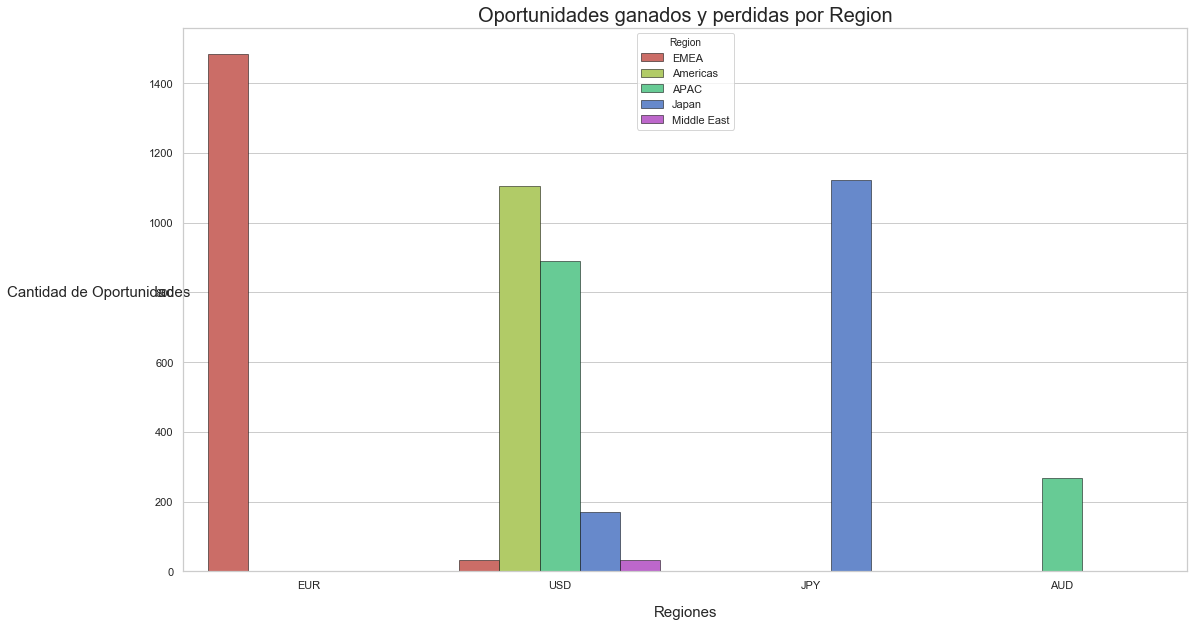

In [183]:
fig, ax = plt.subplots(figsize=(18,10))
                  
g = sns.countplot(x='Total_Taxable_Amount_Currency', hue='Region', data=won_no_duplicados, palette="hls", ax=ax, edgecolor='black', linewidth=0.5)
g.set_title('Oportunidades ganados y perdidas por Region', fontsize=20)
g.set_xlabel('Regiones', labelpad=15, fontsize=15)
g.set_xticklabels(g.get_xticklabels(), fontsize=11)
g.set_ylabel('Cantidad de Oportunidades', rotation=0, labelpad=50, fontsize=15)

Text(0, 0.5, 'Cantidad de Oportunidades')

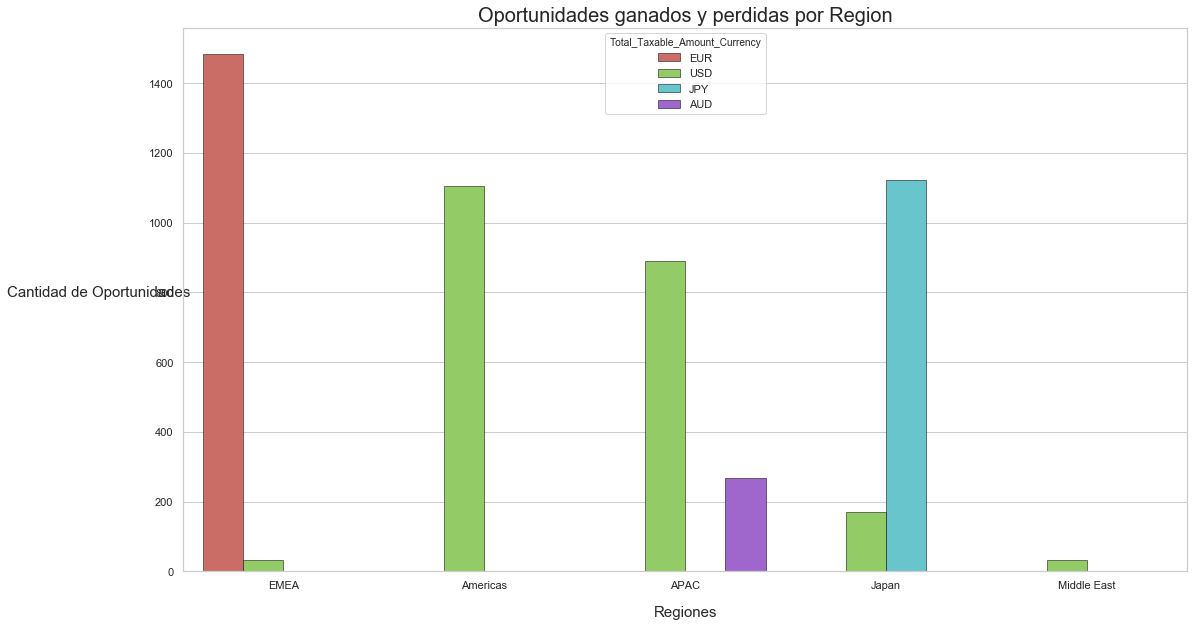

In [184]:
fig, ax = plt.subplots(figsize=(18,10))
                  
g = sns.countplot(x='Region', hue='Total_Taxable_Amount_Currency', data=won_no_duplicados, palette="hls", ax=ax, edgecolor='black', linewidth=0.5)
g.set_title('Oportunidades ganados y perdidas por Region', fontsize=20)
g.set_xlabel('Regiones', labelpad=15, fontsize=15)
g.set_xticklabels(g.get_xticklabels(), fontsize=11)
g.set_ylabel('Cantidad de Oportunidades', rotation=0, labelpad=50, fontsize=15)

Cantidad de ventas por moneda

In [187]:
monedas=won_no_duplicados['Total_Taxable_Amount_Currency'].value_counts()

Text(0, 0.5, 'Stage')

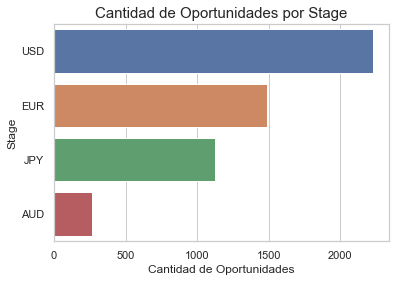

In [188]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=monedas.values, y=monedas.index, orient='h')
g.set_title("Cantidad de Oportunidades por Stage", fontsize=15)
g.set_xlabel("Cantidad de Oportunidades", fontsize=12)
g.set_ylabel("Stage", fontsize=12)

Text(0, 0.5, 'Stage')

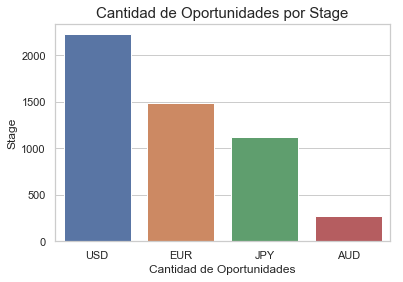

In [190]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
g = sns.barplot(x=monedas.index, y=monedas.values)
g.set_title("Cantidad de Oportunidades por Stage", fontsize=15)
g.set_xlabel("Cantidad de Oportunidades", fontsize=12)
g.set_ylabel("Stage", fontsize=12)

Vamos a analizar las ventas en dolares

In [ ]:
won_no_duplicados

In [197]:
ventas_usd=won_no_duplicados.loc[won_no_duplicados.Total_Taxable_Amount_Currency.str.contains('USD'),:]

toneladas

In [200]:
won= df.loc[(df.Stage.str.contains('Closed Won')),:]

In [202]:
won['suma_frigorias']=won.loc[:,['Opportunity_Name','TRF']].groupby('Opportunity_Name').transform('sum')

In [204]:
won['suma_frigorias'].isnull().sum()

0

In [213]:
won['suma_frigorias']

1         0
2         0
7         0
23        3
63        0
64        5
65        0
66        0
67        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
79       40
80       40
83        1
85        0
86        0
87        0
130       4
131       4
133       0
139       0
140       0
141       0
142       1
         ..
16907     0
16908     0
16909     0
16910     0
16911     0
16912     0
16913     0
16915     0
16916     0
16917     0
16918     0
16919     0
16920    10
16921    10
16922    10
16923     0
16924     0
16925     0
16926     0
16927     0
16931     4
16933     0
16934     0
16935     1
16936     1
16937     1
16939     1
16942     0
16943     0
16944     0
Name: suma_frigorias, Length: 9533, dtype: int64

In [205]:
 df_short=won[['Region','Opportunity_Name','Opportunity_Owner', 'Stage', 'Delivery_Year', 'Total_Taxable_Amount_Currency','Total_Taxable_Amount','suma_frigorias']]

In [206]:
ventas =   df_short.drop_duplicates() 

In [208]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5103 entries, 1 to 16942
Data columns (total 8 columns):
Region                           5103 non-null object
Opportunity_Name                 5103 non-null object
Opportunity_Owner                5103 non-null object
Stage                            5103 non-null object
Delivery_Year                    5103 non-null int64
Total_Taxable_Amount_Currency    5103 non-null object
Total_Taxable_Amount             5103 non-null float64
suma_frigorias                   5103 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 358.8+ KB


In [ ]:
df = df.drop(df[df['D']>10].index)

In [221]:
ventas2 = ventas.drop(ventas[ventas['suma_frigorias']==0].index)

histograma de venta de las frigorias

Text(0, 0.5, 'Frecuencia')

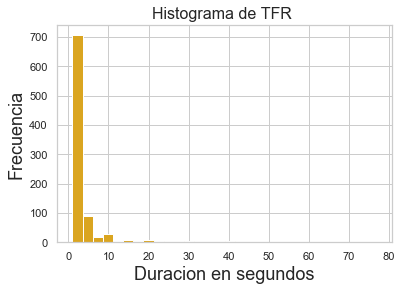

In [225]:
g = ventas2["suma_frigorias"].plot.hist(bins=30, color='goldenrod')
g.set_title("Histograma de TFR ", fontsize=16)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [224]:
ventas2["suma_frigorias"].describe()

count                 889.00
mean                    3.52
std                     7.21
min                     1.00
25%                     1.00
50%                     1.00
75%                     3.00
max                    77.00
Name: suma_frigorias, dtype: float64

In [212]:
ventas

,Region,Opportunity_Name,Opportunity_Owner,Stage,Delivery_Year,Total_Taxable_Amount_Currency,Total_Taxable_Amount,suma_frigorias
1,EMEA,Opportunity_Name_12600,Person_Name_20,Closed Won,2016,EUR,"48,230.00",0
2,Americas,Opportunity_Name_469,Person_Name_8,Closed Won,2016,USD,"83,865.60",0
7,Americas,Opportunity_Name_8227,Person_Name_8,Closed Won,2016,USD,"50,688.00",0
23,APAC,Opportunity_Name_7036,Person_Name_49,Closed Won,2016,USD,"1,621,851.00",3
63,EMEA,Opportunity_Name_4062,Person_Name_13,Closed Won,2016,EUR,"103,350.00",0
64,Americas,Opportunity_Name_6397,Person_Name_8,Closed Won,2016,USD,"3,184,974.00",5
65,Japan,Opportunity_Name_5583,Person_Name_50,Closed Won,2016,JPY,"243,360.00",0
66,EMEA,Opportunity_Name_2804,Person_Name_18,Closed Won,2016,EUR,"214,500.00",0
67,EMEA,Opportunity_Name_2801,Person_Name_18,Closed Won,2016,EUR,"214,500.00",0
70,EMEA,Opportunity_Name_12137,Person_Name_18,Closed Won,2016,EUR,"420,750.00",0


In [227]:
ventas['Total_Taxable_Amount']=pd.to_numeric(ventas.Total_Taxable_Amount,errors='coerce')

Text(0, 0.5, 'Frecuencia')

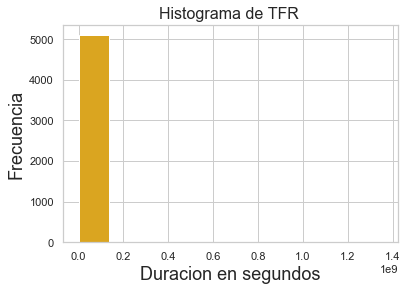

In [230]:
g = ventas["Total_Taxable_Amount"].plot.hist(bins=10, color='goldenrod')
g.set_title("Histograma de TFR ", fontsize=16)
g.set_xlabel("Duracion en segundos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [231]:
ventas['Total_Taxable_Amount'].describe()

count               5,103.00
mean            1,847,072.31
std            20,407,383.69
min                     0.00
25%                59,761.88
50%               109,620.00
75%               468,625.00
max         1,356,338,620.00
Name: Total_Taxable_Amount, dtype: float64

los histogramas no sirven

In [ ]:
fechas=won_no_duplicados['Delivery_Year']

In [ ]:
fechas['Delivery_Year'].value_counts()

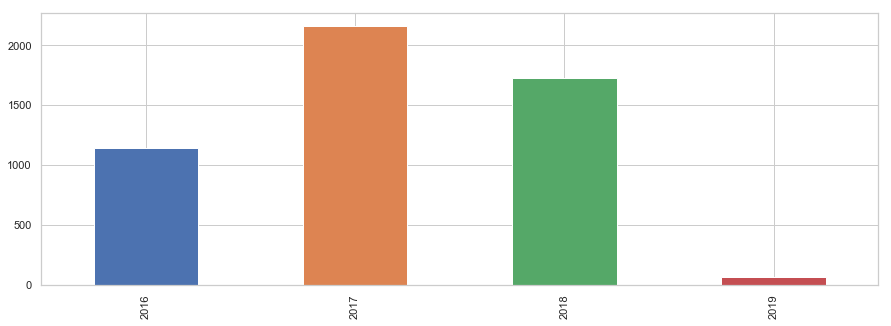

In [233]:
won_no_duplicados['Delivery_Year'].value_counts().sort_index().plot(kind='bar', figsize=(15,5)) # ver layout